In [150]:
import os
import json
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import polars as pl
import matplotlib.pyplot as plt
from PIL import Image

In [43]:
EXP_DIR = Path.cwd()
EXP_ID = EXP_DIR.name
ROOT_DIR = EXP_DIR.parents[2]
DATA_DIR = ROOT_DIR / 'data'
ORIGINAL_DATA_DIR = DATA_DIR / 'original_data/atmaCup#18_dataset'
SAVE_DIR = ROOT_DIR / 'data' / 'created_data' / EXP_ID
SAVE_DIR.mkdir(exist_ok=True, parents=True)

tl_dir = ORIGINAL_DATA_DIR / 'traffic_lights'
tl_json_paths = list(tl_dir.glob('*.json'))

In [155]:
def get_image(ID):
    for postfix in ['-1.0', '-0.5', '']:
        img = Image.open(ORIGINAL_DATA_DIR / 'images' / ID / f'image_t{postfix}.png')
        plt.imshow(img)
        plt.show()

In [40]:
traffic_lights_dfs = []

# 信号機情報が入っているjsonファイルを1件ずつ読み込む
for tl_path in tqdm(tl_json_paths, smoothing=True):
    if os.path.getsize(tl_path) < 3:
        # ファイルサイズが3未満（からのファイル）の場合はスキップ
        # からのファイルはおそらく信号機が映っていない or 検出できなかったものと思われる
        continue
    data_id = tl_path.stem
    # jsonを読み込みフォルダ名からIDカラムを作成
    traffic_lights_dfs.append(pl.read_json(tl_path).with_columns(pl.lit(data_id).alias("ID")))

# jsonから作成した個別のDataFrameを結合
traffic_lights_df = pl.concat(traffic_lights_dfs, how="vertical")
# bboxがListになっているので列に展開
bbox_df = traffic_lights_df["bbox"].list.to_struct(fields=[f"bbox_{i}" for i in range(4)]).struct.unnest()
traffic_lights_df = pl.concat([traffic_lights_df, bbox_df], how="horizontal").select(pl.all().exclude("bbox"))
traffic_lights_df

100% 45098/45098 [01:39<00:00, 454.95it/s]


index,class,ID,bbox_0,bbox_1,bbox_2,bbox_3
i64,str,str,f64,f64,f64,f64
1,"""green""","""000fb056f97572…",63.533428,10.685698,65.621597,11.599558
1,"""green""","""000fb056f97572…",68.003014,6.320143,69.97937,7.251697
1,"""green""","""000fb056f97572…",61.161003,3.923212,63.265633,5.019723
2,"""green""","""000fb056f97572…",71.013817,3.411626,73.286209,4.543561
1,"""green""","""000fb056f97572…",72.7276,0.503714,76.14653,1.831321
…,…,…,…,…,…,…
1,"""red""","""ffe89d836ecae2…",59.524529,0.060051,62.68288,0.973623
1,"""green""","""ffeff0e119ff5e…",58.196117,1.375086,60.608765,2.411379
2,"""green""","""ffeff0e119ff5e…",57.911659,0.96541,61.057396,2.336321


In [124]:
traffic_lights_df.write_csv(SAVE_DIR / 'traffic_light.csv')

In [449]:
traffic_lights_df = pd.read_csv(SAVE_DIR / 'traffic_light.csv')

In [450]:
# classという名前があれなのでclass_nameに変える
traffic_lights_df.rename(columns={'class': 'class_name'}, inplace=True)

traffic_lights_df['bbox_c_x'] = traffic_lights_df.apply(lambda x:(x['bbox_2'] + x['bbox_0']) / 2 , axis=1)
traffic_lights_df['bbox_c_y'] = traffic_lights_df.apply(lambda x:(x['bbox_3'] + x['bbox_1']) / 2 , axis=1)
traffic_lights_df['bbox_aspect'] = traffic_lights_df.apply(lambda x:(x['bbox_2'] - x['bbox_0']) / (x['bbox_3'] - x['bbox_1']) , axis=1)
traffic_lights_df['bbox_area'] = traffic_lights_df.apply(lambda x:(x['bbox_2'] - x['bbox_0']) * (x['bbox_3'] - x['bbox_1']), axis=1)

# 面積が30以上のものを削除
traffic_lights_df = traffic_lights_df.query('bbox_area < 30').reset_index(drop=True)

# 信号の数
tl_count = traffic_lights_df.groupby(['ID']).size().reset_index().rename(columns={0: 'n_traffic_lights'})
traffic_lights_df = traffic_lights_df.merge(tl_count, on='ID')

# bboxをstrにして一意に
traffic_lights_df['bbox_str'] = traffic_lights_df.apply(lambda x:f'[{x["bbox_0"]:.3f}, {x["bbox_1"]:.3f}, {x["bbox_2"]:.3f}, {x["bbox_3"]:.3f}]', axis=1)

# id, bbox, classでsort
traffic_lights_df.sort_values(by=['ID', 'bbox_str', 'class_name'], inplace=True)

# 一つの信号機に対するclassの組み合わせを取得
same_tl_df = traffic_lights_df.groupby(['ID', 'bbox_str'])['class_name'].unique().reset_index().rename(columns={'class_name': 'class_unique'})

# 一つの信号機に対するclassの組み合わせの個数を取得
same_tl_size_df = traffic_lights_df.groupby(['ID', 'bbox_str'])['class_name'].nunique().reset_index().rename(columns={'class_name': 'n_signs'})

# 一つの信号の情報をマージ
traffic_lights_df = traffic_lights_df.merge(same_tl_df, on=['ID', 'bbox_str'])
traffic_lights_df = traffic_lights_df.merge(same_tl_size_df, on=['ID', 'bbox_str'])

# IDに対して最大の面積の信号のみ使う
area_df = traffic_lights_df.drop_duplicates(['ID', 'bbox_str'])[['ID', 'bbox_str', 'bbox_area']]
area_df = area_df.groupby(['ID'])[['bbox_area']].rank(ascending=False).astype(int)
traffic_lights_df = traffic_lights_df.loc[area_df.query('bbox_area == 1').index]

In [451]:
tl_feature_df = traffic_lights_df[['ID', 'bbox_c_x', 'bbox_c_y', 'bbox_aspect', 'bbox_area', 'n_signs', 'n_traffic_lights', 'class_unique']].copy()
sign_columns = ['green', 'yellow', 'red', 'straight', 'left', 'right', 'empty', 'other']
tl_feature_df.reset_index(drop=True, inplace=True)

tl_feature_df[[f'sign_{c}' for c in sign_columns]] = 0
for i, row in tqdm(tl_feature_df.iterrows(), total=len(tl_feature_df)):
    for class_name in row['class_unique']:
        tl_feature_df.loc[i, f'sign_{class_name}'] = 1
tl_feature_df.drop('class_unique', axis=1, inplace=True)

100% 6371/6371 [00:00<00:00, 8434.83it/s]


In [452]:
tl_feature_df

,ID,bbox_c_x,bbox_c_y,bbox_aspect,bbox_area,n_signs,n_traffic_lights,sign_green,sign_yellow,sign_red,sign_straight,sign_left,sign_right,sign_empty,sign_other
0,000fb056f97572d384bae4f5fc1e0f28_20,64.577513,11.142628,2.284998,1.908295,1,1,1,0,0,0,0,0,0,0
1,000fb056f97572d384bae4f5fc1e0f28_220,68.991192,6.785920,2.121571,1.841082,1,1,1,0,0,0,0,0,0,0
2,000fb056f97572d384bae4f5fc1e0f28_320,72.150013,3.977593,2.007530,2.572199,1,2,1,0,0,0,0,0,0,0
3,000fb056f97572d384bae4f5fc1e0f28_420,74.437065,1.167518,2.575257,4.538996,1,1,1,0,0,0,0,0,0,0
4,000fb056f97572d384bae4f5fc1e0f28_520,73.396355,5.720062,2.154420,2.143050,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,ffe81f51c01f4e89501aea8b51bf13d9_320,78.604946,4.205105,2.122388,2.487210,1,4,1,0,0,0,0,0,0,0
6367,ffe81f51c01f4e89501aea8b51bf13d9_420,67.832825,4.904985,2.514507,0.706113,1,3,1,0,0,0,0,0,0,0
6368,ffe81f51c01f4e89501aea8b51bf13d9_520,84.213417,1.333270,1.680377,5.781639,1,4,1,0,0,0,0,0,0,0
6369,ffe89d836ecae270d82b1903e6245149_120,61.103704,0.516837,3.457144,2.885384,1,1,0,0,1,0,0,0,0,0


In [320]:
# classという名前があれなのでclass_nameに変える
traffic_lights_df.rename(columns={'class': 'class_name'}, inplace=True)

In [321]:
#  [左上の x 座標 / 左上の y 座標 / 右下の x 座標 / 右下の y 座標 ] 

In [322]:
traffic_lights_df['area'] = traffic_lights_df.apply(lambda x:(x['bbox_2'] - x['bbox_0']) * (x['bbox_3'] - x['bbox_1']), axis=1)

In [323]:
# 面積が30以上のものを削除

In [324]:
traffic_lights_df = traffic_lights_df.query('area < 30').reset_index(drop=True)

In [325]:
# emptyとotherを削除

In [326]:
traffic_lights_df = traffic_lights_df.query('class_name not in ["empty", "other"]').reset_index(drop=True)

In [327]:
traffic_lights_df['bbox_str'] = traffic_lights_df.apply(lambda x:f'[{x["bbox_0"]:.3f}, {x["bbox_1"]:.3f}, {x["bbox_2"]:.3f}, {x["bbox_3"]:.3f}]', axis=1)

In [328]:
traffic_lights_df.sort_values(by=['ID', 'bbox_str', 'class_name'], inplace=True)

In [329]:
same_tl_df = traffic_lights_df.groupby(['ID', 'bbox_str'])['class_name'].unique().reset_index().rename(columns={'class_name': 'class_unique'})

In [330]:
same_tl_size_df = traffic_lights_df.groupby(['ID', 'bbox_str'])['class_name'].nunique().reset_index().rename(columns={'class_name': 'class_size'})

In [331]:
traffic_lights_df = traffic_lights_df.merge(same_tl_df, on=['ID', 'bbox_str'])
traffic_lights_df = traffic_lights_df.merge(same_tl_size_df, on=['ID', 'bbox_str'])

In [332]:
traffic_lights_df['class_unique_str'] = traffic_lights_df['class_unique'].astype('str')

In [338]:
traffic_lights_df

,index,class_name,ID,bbox_0,bbox_1,bbox_2,bbox_3,area,bbox_str,class_unique,class_size,class_unique_str
0,1,green,000fb056f97572d384bae4f5fc1e0f28_20,63.533428,10.685698,65.621597,11.599558,1.908295,"[63.533, 10.686, 65.622, 11.600]",[green],1,['green']
1,1,green,000fb056f97572d384bae4f5fc1e0f28_220,68.003014,6.320143,69.979370,7.251697,1.841082,"[68.003, 6.320, 69.979, 7.252]",[green],1,['green']
2,1,green,000fb056f97572d384bae4f5fc1e0f28_320,61.161003,3.923212,63.265633,5.019723,2.307751,"[61.161, 3.923, 63.266, 5.020]",[green],1,['green']
3,2,green,000fb056f97572d384bae4f5fc1e0f28_320,71.013817,3.411626,73.286209,4.543561,2.572199,"[71.014, 3.412, 73.286, 4.544]",[green],1,['green']
4,1,green,000fb056f97572d384bae4f5fc1e0f28_420,72.727600,0.503714,76.146530,1.831321,4.538996,"[72.728, 0.504, 76.147, 1.831]",[green],1,['green']
...,...,...,...,...,...,...,...,...,...,...,...,...
12978,1,red,ffe89d836ecae270d82b1903e6245149_120,59.524529,0.060051,62.682880,0.973623,2.885384,"[59.525, 0.060, 62.683, 0.974]",[red],1,['red']
12979,4,green,ffeff0e119ff5eb6885d834ea6a9667a_220,57.155560,1.277252,59.610077,2.284031,2.471156,"[57.156, 1.277, 59.610, 2.284]",[green],1,['green']
12980,2,green,ffeff0e119ff5eb6885d834ea6a9667a_220,57.911659,0.965410,61.057396,2.336321,4.312524,"[57.912, 0.965, 61.057, 2.336]",[green],1,['green']
12981,1,green,ffeff0e119ff5eb6885d834ea6a9667a_220,58.196117,1.375086,60.608765,2.411379,2.500211,"[58.196, 1.375, 60.609, 2.411]",[green],1,['green']


In [364]:
area_df = traffic_lights_df.drop_duplicates(['ID', 'bbox_str'])[['ID', 'bbox_str', 'area']]

In [382]:
area_df['ID'].nunique()

6371

In [375]:
area_rank_df = area_df.groupby(['ID'])[['area']].rank(ascending=False).astype(int)

In [379]:
area_rank_df.value_counts()

area
1       6371
2       3209
3       1337
4        544
5        232
6        101
7         49
8         19
9          5
10         2
11         1
Name: count, dtype: int64

In [384]:
traffic_lights_df.loc[area_rank_df.query('area == 1').index]

,index,class_name,ID,bbox_0,bbox_1,bbox_2,bbox_3,area,bbox_str,class_unique,class_size,class_unique_str,area_rank
0,1,green,000fb056f97572d384bae4f5fc1e0f28_20,63.533428,10.685698,65.621597,11.599558,1.908295,"[63.533, 10.686, 65.622, 11.600]",[green],1,['green'],1
1,1,green,000fb056f97572d384bae4f5fc1e0f28_220,68.003014,6.320143,69.979370,7.251697,1.841082,"[68.003, 6.320, 69.979, 7.252]",[green],1,['green'],1
3,2,green,000fb056f97572d384bae4f5fc1e0f28_320,71.013817,3.411626,73.286209,4.543561,2.572199,"[71.014, 3.412, 73.286, 4.544]",[green],1,['green'],1
4,1,green,000fb056f97572d384bae4f5fc1e0f28_420,72.727600,0.503714,76.146530,1.831321,4.538996,"[72.728, 0.504, 76.147, 1.831]",[green],1,['green'],1
5,1,green,000fb056f97572d384bae4f5fc1e0f28_520,72.321991,5.221383,74.470718,6.218740,2.143050,"[72.322, 5.221, 74.471, 6.219]",[green],1,['green'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12968,2,green,ffe81f51c01f4e89501aea8b51bf13d9_320,77.456161,3.663836,79.753731,4.746375,2.487210,"[77.456, 3.664, 79.754, 4.746]",[green],1,['green'],1
12973,3,green,ffe81f51c01f4e89501aea8b51bf13d9_420,67.166580,4.640025,68.499069,5.169946,0.706113,"[67.167, 4.640, 68.499, 5.170]",[green],1,['green'],1
12977,2,green,ffe81f51c01f4e89501aea8b51bf13d9_520,82.654945,0.405817,85.771889,2.260724,5.781639,"[82.655, 0.406, 85.772, 2.261]",[green],1,['green'],1
12978,1,red,ffe89d836ecae270d82b1903e6245149_120,59.524529,0.060051,62.682880,0.973623,2.885384,"[59.525, 0.060, 62.683, 0.974]",[red],1,['red'],1


In [341]:
traffic_lights_df['area_rank'] = traffic_lights_df.groupby(['bbox_str'])['area'].rank(method='first').astype(int)

In [342]:
traffic_lights_df.query('area_rank == 2')

,index,class_name,ID,bbox_0,bbox_1,bbox_2,bbox_3,area,bbox_str,class_unique,class_size,class_unique_str,area_rank
36,3,red,00f6240dfcfbe3a331375bb6c43f1623_20,68.392204,1.286841,71.239082,2.515719,3.498466,"[68.392, 1.287, 71.239, 2.516]","[green, red]",2,['green' 'red'],2
40,3,red,01028e57b9dfb7615ce727d2966a81b0_20,103.321449,0.251151,106.982384,2.657737,8.810355,"[103.321, 0.251, 106.982, 2.658]","[green, red]",2,['green' 'red'],2
77,4,straight,01cba995d62fbf4f6d314ec5a5fe1e33_520,61.691730,2.939279,63.768330,4.489943,3.220107,"[61.692, 2.939, 63.768, 4.490]","[red, straight]",2,['red' 'straight'],2
103,3,straight,023c083b59c83a9cfca02d277467f4c8_520,70.612442,-0.040386,74.016197,1.743132,6.070659,"[70.612, -0.040, 74.016, 1.743]","[red, straight]",2,['red' 'straight'],2
122,3,straight,02ac250dc20d65ade5ea621f2a6da536_220,72.400238,9.060937,74.023758,10.205140,1.857637,"[72.400, 9.061, 74.024, 10.205]","[left, straight]",2,['left' 'straight'],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12916,1,red,ff16241b113e3bc3d1722ca2526f9d8d_220,89.450241,-0.057644,92.816391,1.980827,6.861798,"[89.450, -0.058, 92.816, 1.981]","[left, red, straight]",3,['left' 'red' 'straight'],2
12921,2,right,ff2a427810de485e4d011c125ad7159f_520,71.664665,0.129299,75.202103,2.676334,9.009975,"[71.665, 0.129, 75.202, 2.676]","[red, right]",2,['red' 'right'],2
12929,4,red,ff428470b221e1d91a49ff713fee8625_420,69.737877,0.081599,73.902260,1.757169,6.977715,"[69.738, 0.082, 73.902, 1.757]","[green, red, yellow]",3,['green' 'red' 'yellow'],2
12952,5,right,ff9687f88f91f5c90c3c258789103821_20,123.901390,0.020840,128.140182,1.840994,7.715254,"[123.901, 0.021, 128.140, 1.841]","[red, right]",2,['red' 'right'],2


In [344]:
traffic_lights_df.query('ID == "00f6240dfcfbe3a331375bb6c43f1623_20"')

,index,class_name,ID,bbox_0,bbox_1,bbox_2,bbox_3,area,bbox_str,class_unique,class_size,class_unique_str,area_rank
35,2,green,00f6240dfcfbe3a331375bb6c43f1623_20,68.392204,1.286841,71.239082,2.515719,3.498466,"[68.392, 1.287, 71.239, 2.516]","[green, red]",2,['green' 'red'],1
36,3,red,00f6240dfcfbe3a331375bb6c43f1623_20,68.392204,1.286841,71.239082,2.515719,3.498466,"[68.392, 1.287, 71.239, 2.516]","[green, red]",2,['green' 'red'],2


In [ ]:
traffic_lights_df.groupby('bbox_str')

In [318]:
sum(traffic_lights_df['class_size'] == 1)

11077

In [306]:
traffic_lights_df.groupby('ID')['bbox_str'].nunique().max()

11

In [ ]:
# yellow, red, (left, straight, right)

In [295]:
traffic_lights_df["class_unique_str"].value_counts()

class_unique_str
['green']                            5788
['red']                              4256
['left' 'red' 'straight']             822
['yellow']                            607
['left' 'straight']                   210
['red' 'right']                       194
['right']                             163
['red' 'straight']                    162
['straight']                          153
['left' 'red']                        124
['green' 'red']                       110
['left']                              110
['red' 'yellow']                       86
['red' 'right' 'straight']             45
['green' 'yellow']                     32
['green' 'red' 'yellow']               27
['left' 'right']                       22
['green' 'left' 'red' 'straight']      16
['right' 'straight']                   16
['left' 'right' 'straight']            15
['green' 'red' 'right']                 6
['left' 'red' 'right']                  6
['left' 'red' 'right' 'straight']       4
['green' 'red' 'r

In [ ]:
# count encoding

In [ ]:
# red
# left, straint, right
# yellow
# left
# right
# left, straight
# right, straight

In [ ]:
# red & yellow -> red
# green & yellow -> yellow
# 

In [308]:
target = "['left' 'red' 'right' 'straight']"
traffic_lights_df.query('class_unique_str == @target')

,index,class_name,ID,bbox_0,bbox_1,bbox_2,bbox_3,area,bbox_str,class_unique,class_size,class_unique_str
6450,3,left,7e16f0b58a6f7c7df23fe89a0f4d9c01_520,63.506145,9.678665,64.640083,10.352571,0.764168,"[63.506, 9.679, 64.640, 10.353]","[left, red, right, straight]",4,['left' 'red' 'right' 'straight']
6451,1,red,7e16f0b58a6f7c7df23fe89a0f4d9c01_520,63.506145,9.678665,64.640083,10.352571,0.764168,"[63.506, 9.679, 64.640, 10.353]","[left, red, right, straight]",4,['left' 'red' 'right' 'straight']
6452,7,right,7e16f0b58a6f7c7df23fe89a0f4d9c01_520,63.506145,9.678665,64.640083,10.352571,0.764168,"[63.506, 9.679, 64.640, 10.353]","[left, red, right, straight]",4,['left' 'red' 'right' 'straight']
6453,4,straight,7e16f0b58a6f7c7df23fe89a0f4d9c01_520,63.506145,9.678665,64.640083,10.352571,0.764168,"[63.506, 9.679, 64.640, 10.353]","[left, red, right, straight]",4,['left' 'red' 'right' 'straight']


6450    [left, red, right, straight]
6451    [left, red, right, straight]
6452    [left, red, right, straight]
6453    [left, red, right, straight]
6454                [left, straight]
6455                [left, straight]
6456                           [red]
Name: class_unique, dtype: object
6450    [63.506, 9.679, 64.640, 10.353]
6451    [63.506, 9.679, 64.640, 10.353]
6452    [63.506, 9.679, 64.640, 10.353]
6453    [63.506, 9.679, 64.640, 10.353]
6454    [72.682, 9.596, 73.915, 10.387]
6455    [72.682, 9.596, 73.915, 10.387]
6456    [72.725, 9.615, 73.932, 10.368]
Name: bbox_str, dtype: object
6450    0.764168
6451    0.764168
6452    0.764168
6453    0.764168
6454    0.974951
6455    0.974951
6456    0.910060
Name: area, dtype: float64


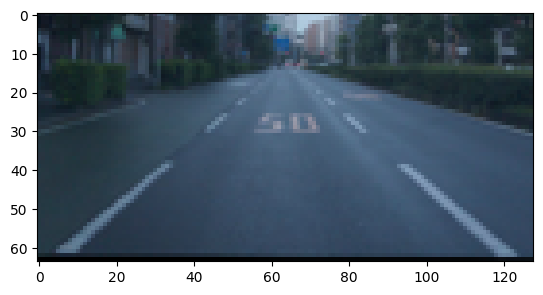

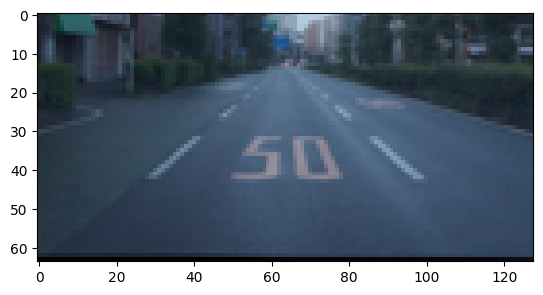

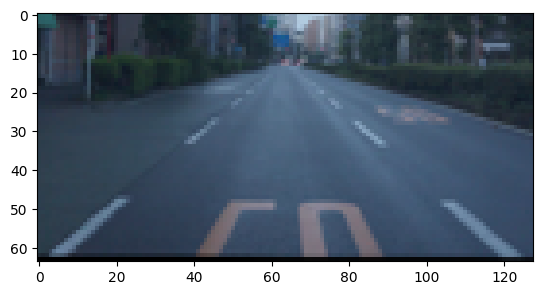

In [310]:
id_ = '7e16f0b58a6f7c7df23fe89a0f4d9c01_520'
print(traffic_lights_df.query('ID == @id_')['class_unique'])
print(traffic_lights_df.query('ID == @id_')['bbox_str'])
print(traffic_lights_df.query('ID == @id_')['area'])
get_image(id_)

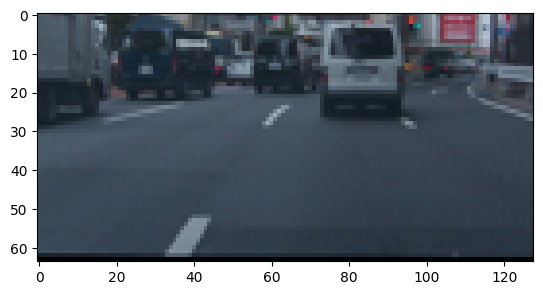

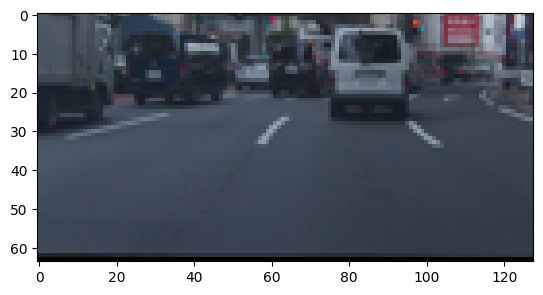

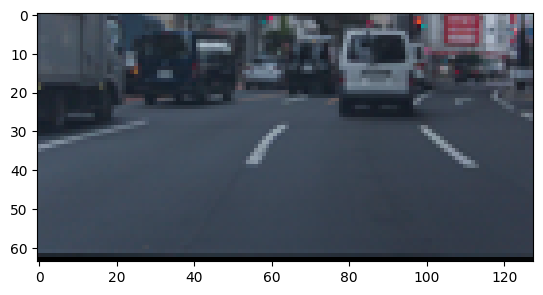

In [171]:
get_image('8effb2f4e61f5e72a0bc56ed4f6034c6_420')

In [176]:
traffic_lights_df.query('ID == "8effb2f4e61f5e72a0bc56ed4f6034c6_420"')

,index,class,ID,bbox_0,bbox_1,bbox_2,bbox_3,bbox_str,class_unique,class_size,class_unique_str
8104,9,left,8effb2f4e61f5e72a0bc56ed4f6034c6_420,120.794983,4.259680,123.496620,6.366278,"[120.795, 4.260, 123.497, 6.366]","[left, right]",2,['left' 'right']
8105,11,right,8effb2f4e61f5e72a0bc56ed4f6034c6_420,120.794983,4.259680,123.496620,6.366278,"[120.795, 4.260, 123.497, 6.366]","[left, right]",2,['left' 'right']
8106,15,other,8effb2f4e61f5e72a0bc56ed4f6034c6_420,120.798317,4.262911,123.554642,6.444196,"[120.798, 4.263, 123.555, 6.444]",[other],1,['other']
8107,1,red,8effb2f4e61f5e72a0bc56ed4f6034c6_420,120.824379,4.266343,123.513634,6.433106,"[120.824, 4.266, 123.514, 6.433]","[red, straight]",2,['red' 'straight']
8108,2,straight,8effb2f4e61f5e72a0bc56ed4f6034c6_420,120.824379,4.266343,123.513634,6.433106,"[120.824, 4.266, 123.514, 6.433]","[red, straight]",2,['red' 'straight']
8109,10,straight,8effb2f4e61f5e72a0bc56ed4f6034c6_420,57.472858,0.720950,61.011360,3.095182,"[57.473, 0.721, 61.011, 3.095]",[straight],1,['straight']
8110,4,left,8effb2f4e61f5e72a0bc56ed4f6034c6_420,57.596935,0.816317,60.910656,3.115327,"[57.597, 0.816, 60.911, 3.115]",[left],1,['left']
8111,3,red,8effb2f4e61f5e72a0bc56ed4f6034c6_420,57.661121,0.916290,60.863869,3.068532,"[57.661, 0.916, 60.864, 3.069]",[red],1,['red']
8112,18,red,8effb2f4e61f5e72a0bc56ed4f6034c6_420,96.834801,1.512210,100.473465,3.791259,"[96.835, 1.512, 100.473, 3.791]",[red],1,['red']
8113,14,right,8effb2f4e61f5e72a0bc56ed4f6034c6_420,97.433884,1.701815,100.635864,4.132282,"[97.434, 1.702, 100.636, 4.132]",[right],1,['right']


In [127]:
traffic_lights_df.groupby(['ID'])['class'].unique().reset_index().astype(str)['class'].value_counts()

class
['green']                                    2767
['red']                                      1914
['empty']                                     575
['yellow']                                    311
['left' 'red' 'straight']                     127
                                             ... 
['empty' 'yellow' 'red' 'green']                1
['empty' 'green' 'left' 'red']                  1
['right' 'left' 'red' 'straight' 'green']       1
['red' 'yellow' 'empty' 'green']                1
['straight' 'right' 'red' 'empty']              1
Name: count, Length: 202, dtype: int64

In [170]:
traffic_lights_df.groupby(['ID'])['bbox_str'].nunique().sort_values()

ID
000fb056f97572d384bae4f5fc1e0f28_20      1
826887176781b39163d017dd5a8297e5_20      1
826887176781b39163d017dd5a8297e5_420     1
f3800b240a83df391b73881af6486489_520     1
82bee1f6375d96b0949e13a1e9cef961_520     1
                                        ..
d13f6ef0473064513d0c6d10beada258_120     9
479851d7c70b346a89691e5c7268428f_20      9
c3d4e5d7c6adb90641bcc50c9933bcc2_320    10
d1417d8a0e183291168d0a75651939fc_420    11
8effb2f4e61f5e72a0bc56ed4f6034c6_420    12
Name: bbox_str, Length: 6960, dtype: int64